## Data Acquisition Project

#### Step 1: Kaggle dataset

In [85]:
import pandas as pd

In [86]:
# loading full dataset
df = pd.read_csv("US_AIR_POLLUTION.csv")

In [87]:
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


Cleaning the dataset and getting a random sample of 20000 rows

In [88]:
# dropping column which are not necessary
df = df.drop(columns=["Unnamed: 0"])

# random sample of 20,000 rows
sample_df = df.sample(n=20000, random_state=1).reset_index(drop=True)

# converting date column to datetime
sample_df['Date Local'] = pd.to_datetime(sample_df['Date Local'])

sample_df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,6,19,8,"3425 N FIRST ST, FRESNO",California,Fresno,Fresno,2009-11-09,Parts per billion,21.956522,...,Parts per billion,2.000000,2.0,0,3.0,Parts per million,0.687500,1.400,1,16.0
1,22,33,9,1061-A Leesville Ave,Louisiana,East Baton Rouge,Baton Rouge,2011-04-18,Parts per billion,10.912500,...,Parts per billion,0.150000,0.5,2,NaN,Parts per million,0.200000,0.200,0,2.0
2,5,119,7,PIKE AVE AT RIVER ROAD,Arkansas,Pulaski,North Little Rock,2012-05-10,Parts per billion,12.433333,...,Parts per billion,0.912500,1.1,8,NaN,Parts per million,0.242292,0.297,0,NaN
3,6,71,306,"14306 PARK AVE., VICTORVILLE, CA",California,San Bernardino,Victorville,2006-11-27,Parts per billion,12.956522,...,Parts per billion,0.742857,1.0,11,NaN,Parts per million,0.239130,0.400,17,NaN
4,48,141,37,250 Rim Rd,Texas,El Paso,El Paso,2013-07-16,Parts per billion,5.088889,...,Parts per billion,0.333333,0.6,7,0.0,Parts per million,0.011111,0.100,6,NaN


In [89]:
sample_df.to_csv("Sample_US_Air_Pollution.csv", index=False, sep=";")


Dataset Description

The dataset has daily records of air pollution in the stations of the USA from 2000 and to 2016.
Once I have done a preliminary cheque, I eliminated the column that is not needed by the analysis and sampled out 20000 rows randomly.

#### Step 2: Web scrape a complementary dataset

Importing and scraping

In [ ]:
url = "https://www.citypopulation.de/en/usa/cities/"

# reading the table I am interested in
tables = pd.read_html(url)
population_df = tables[0]

print(population_df.columns)



Index(['Name', 'Abbr.', 'Status', 'Capital', 'Area A-L (km²)',
       'Population Census (C) 1990-04-01', 'Population Census (C) 2000-04-01',
       'Population Census (C) 2010-04-01', 'Population Census (C) 2020-04-01',
       'Population Estimate (E) 2024-07-01', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


In [91]:
population_df.head()

,Name,Abbr.,Status,Capital,Area A-L (km²),Population Census (C) 1990-04-01,Population Census (C) 2000-04-01,Population Census (C) 2010-04-01,Population Census (C) 2020-04-01,Population Estimate (E) 2024-07-01,Unnamed: 10,Unnamed: 11
0,Alabama,AL,FSt,Montgomery,131174,4040587,4447100,4779736,5024279,5157699,13117400.0,→
1,Alaska,AK,FSt,Juneau,1478840,550043,626932,710231,733391,740133,147884000.0,→
2,Arizona,AZ,FSt,Phoenix,294199,3665228,5130632,6392017,7151502,7582384,29419900.0,→
3,Arkansas,AR,FSt,Little Rock,134769,2350725,2673400,2915918,3011524,3088354,13476900.0,→
4,California,CA,FSt,Sacramento,403504,29760021,33871648,37253956,39538223,39431263,40350400.0,→


Cleaning Population data

In [ ]:
# keeping only relevant columns
population_df = population_df[['Name', 'Abbr.', 'Capital', 'Population Census (C) 2010-04-01']]

# renaming the columns
population_df.columns = ['State', 'State_Abbr','City', 'Population_2010']

# formatting for merging: UPPERCASE and removing whitespaces
population_df['State'] = population_df['State'].str.upper().str.strip()
population_df['State_Abbr'] = population_df['State_Abbr'].str.upper().str.strip()
population_df['City'] = population_df['City'].str.upper().str.strip()
population_df['Population_2010'] = (population_df['Population_2010'].astype(int))

population_df.head()

C:\Users\susan\AppData\Local\Temp\ipykernel_25280\1657744447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df['State'] = population_df['State'].str.upper().str.strip()
C:\Users\susan\AppData\Local\Temp\ipykernel_25280\1657744447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df['State_Abbr'] = population_df['State_Abbr'].str.upper().str.strip()
C:\Users\susan\AppData\Local\Temp\ipykernel_25280\1657744447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,State,State_Abbr,City,Population_2010
0,ALABAMA,AL,MONTGOMERY,4779736
1,ALASKA,AK,JUNEAU,710231
2,ARIZONA,AZ,PHOENIX,6392017
3,ARKANSAS,AR,LITTLE ROCK,2915918
4,CALIFORNIA,CA,SACRAMENTO,37253956


#### Step 3: Merge US Air Pollution Sample with Population Data

In [ ]:
# making sure that sample is formatted
sample_df['City'] = sample_df['City'].str.upper().str.strip()
sample_df['State'] = sample_df['State'].str.upper().str.strip()


In [ ]:
# merging sample_df with population_df using City (capital) and State
merged_df = pd.merge(sample_df, population_df, on=['City', 'State'], how='inner')

In [95]:
# dropping rows where population is NA
merged_df = merged_df.dropna(subset=['Population_2010']).reset_index(drop=True)

In [96]:
print("Rows matched:", len(merged_df))
print(merged_df[['City','State','Population_2010']].head())


Rows matched: 1632
          City      State  Population_2010
0  BATON ROUGE  LOUISIANA          4533372
1  BATON ROUGE  LOUISIANA          4533372
2  BATON ROUGE  LOUISIANA          4533372
3  BATON ROUGE  LOUISIANA          4533372
4  BATON ROUGE  LOUISIANA          4533372


In [97]:
merged_df.to_csv("city_pollution_merged.csv", index=False)


#### **Description and Explanation**

In order to provide the sample data on USA air pollution with population context, I combined it with an additional dataset with 2010 population figures of USA state capitals.
This will enable the determination of whether increased levels of population are correlated with more serious population.

**Merge Stategy**

The initial difficulty was to guarantee that the names of the cities and states was matching the correct way of the two datasets of the ywo.
I had therefore coded both the City and State columns to uppercase and deleted the whitespaces.

I tested two merge startegies:

- **Merge on both 'City' and 'State'**:
This enables to ensure that the matching is correct. In the USA we might have the same name but of different cities belonging to different states thus it is best to ensure we have the correct data (e.g., "PHONEIX, ARIZONA","PHONEIX, LOUISIANA). This yielded to 1632 matched rows.
- **Merge on 'City' only**:
This match does not take into account the names of the states, and gives a result of 2230 matched rows, although it has a slight probability of a mismatch in cities with similar names across states.

**Final Decision**

To be more precise, I combined the two datasets on the basis of both the 'City' and the 'State' columns.
This will ensure that the readings of pollution in cities that share names are only matched to their respective state capital.

**Cleaning Steps**

- Converted all 'City' and 'State' names to uppercase and removed extra spaces
- Ensured the population column ('Population_2010') was in integer format
- Dropped any rows from the merged data that did not have population values

The resulting DataFrame will hold air pollution data with city level population values that will be utilised in the following step to investigate possible correlations and trends using visualisation.


#### Step 4: Explore and Visualise Merged Data

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

**Poplualtion vs NO₂ Mean**

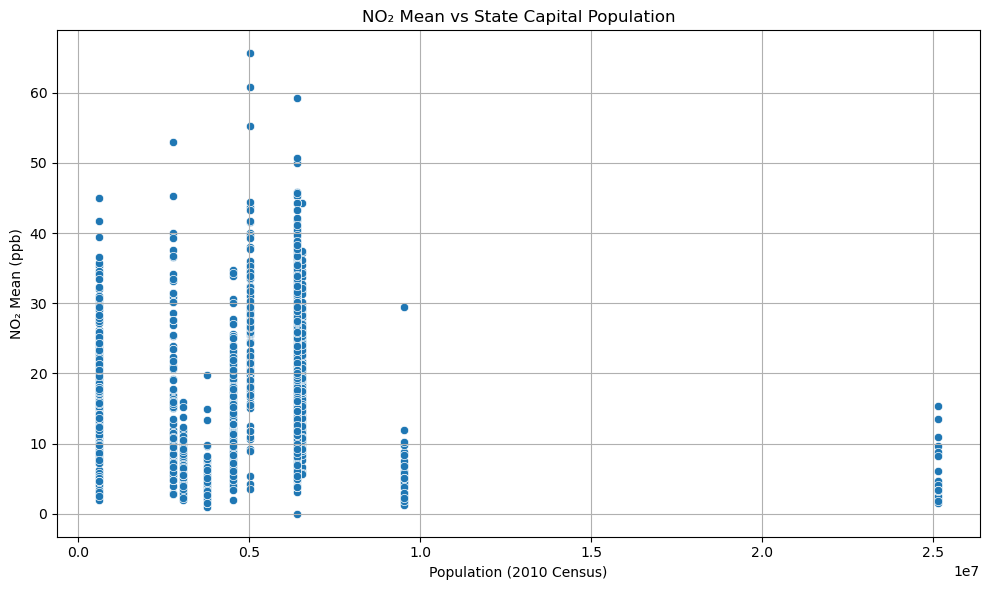

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Population_2010', y='NO2 Mean')
plt.title("NO₂ Mean vs State Capital Population")
plt.xlabel("Population (2010 Census)")
plt.ylabel("NO₂ Mean (ppb)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight**: This compares the average NO₂ concentration to the 2010 population of each USA state capital.

**Observations**:

- The population size and the mean levels of NO₂ have no distinct linear relation. Cities that have low and high populations have a great variation in NO₂ values.
- There are quite a few cities of moderate population where the level of NO₂ is quite high, which is why local variables such as traffic jams, industry, or geographical location may be more significant than the population itself.
- The largest capital is not the highest in terms of NO₂, but a moderate level, and this suggests that big cities can control the quantity of pollution better.
- The clustering of points vertically, indicates that there are numerous cities which have similar population sizes, yet record significantly different results in terms of NO₂, which once again argues that population is not a good stand-alone predictor of NO₂ pollution.

In conclusion, the chart identifies that even though population is one of the factors that can cause pressure on the air quality, it is not probably the main contributor to NO2 in the U.S. capital cities.


**NO₂ by Population Group**

In [ ]:
# creating quartile-based population groups
merged_df['Population_Group'] = pd.qcut(merged_df['Population_2010'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])


c:\Users\susan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


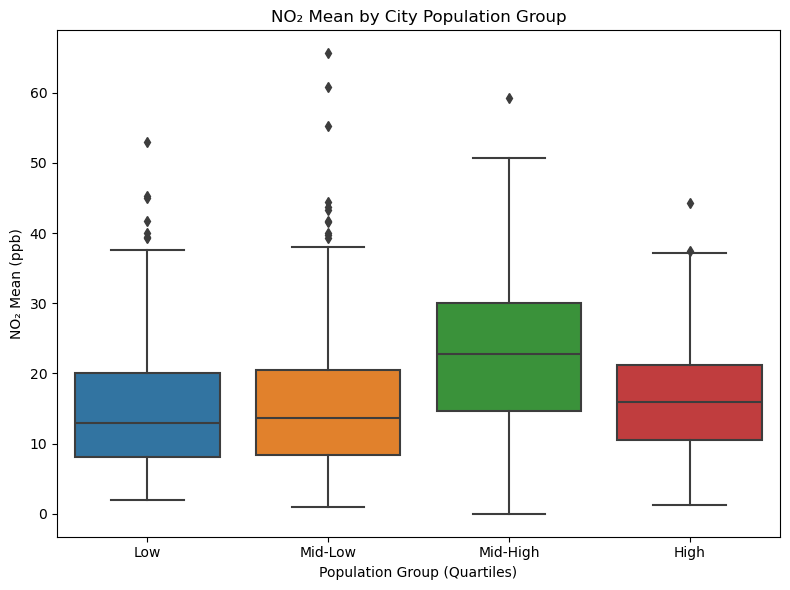

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='Population_Group', y='NO2 Mean')
plt.title("NO₂ Mean by City Population Group")
plt.xlabel("Population Group (Quartiles)")
plt.ylabel("NO₂ Mean (ppb)")
plt.tight_layout()
plt.show()


**Insight**: This compares the average NO₂ concentrations across four population quartiles: Low, Mid-Low, Mid-High, and High.

**Observations**:

- Among all population groups, the Mid-High population group has the greatest median NO₂ levels, having a wider interquartile range (IQR) and numerous high-value outliers, which means that it has more variability of pollution by these cities.
- Indeed, surprisingly, the High population cluster has lesser median NO₂ level compared to the Mid-High cluster, which indicates that the most populated capital cities can have better air quality regulation, infrastructure, or energy policy.
- The NO₂ levels in the Low and Mid-Low groups have rather similar medians and reduced extreme outliers.

In general, this plot implies that population size is not the perfect predictor of NO₂ pollution levels. Moderately sized cities are more likely to have larger NO₂ averages, but the largest cities are likely to have put in more significant pollution control efforts.


**Top 10 Capitals by CO AQI**

In [ ]:
# getting average CO AQI per city
top_cities = merged_df.groupby('City')['CO AQI'].mean().sort_values(ascending=False).head(10)


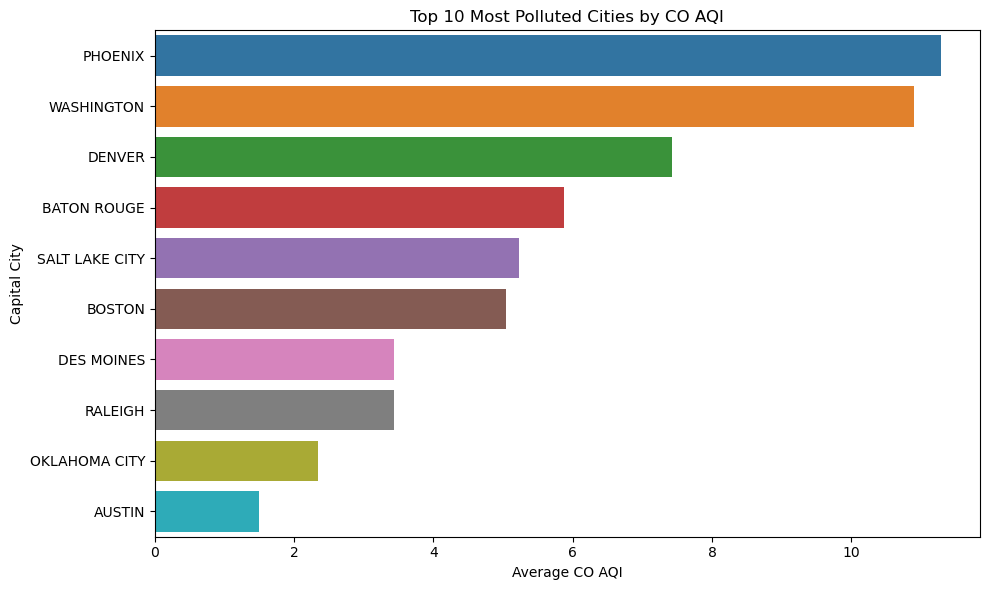

In [ ]:
# resetting for plotting
top_cities = top_cities.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='CO AQI', y='City')
plt.title("Top 10 Most Polluted Cities by CO AQI")
plt.xlabel("Average CO AQI")
plt.ylabel("Capital City")
plt.tight_layout()
plt.show()

**Insight**:
This illustrates the average Carbon Monoxide (CO) AQI levels across the top 10 most polluted USA state capitals in the dataset.

**Observations**:

- PHOENIX and WASHINGTON have the highest average CO AQI which is far higher than others. This poses that an increase in the density of vehicles or industrial operations might be leading to the increase of carbon monoxide in these cities.

- DENVER and BATON ROUGE are not the least in CO AQI which may be affected by the altitude (Denver) or the high traffic or oil refining (Baton Rouge).

- AUSTIN, OKLAHOMA CITY, and RALEIGH possess a better CO air quality, but still very high than other parts of the country.

- Large well-known capitals such as BOSTON and SALT LAKE CITY indicate that urbanisation may not be the complete cause of CO pollution. Such factors as the efficiency of the public transport, vehicle emission standards, and topography of the area might be significant.

This discussion demonstrates that despite it being evident that CO pollution is a problem in most capitals, it does not always correlate with the size of the population. These differences are probably caused by targeted local factors.